Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)         2

1076/1076 [==============================] - 223s 207ms/step - loss: 1.4339 - accuracy: 0.6586 - val_loss: 1.1507 - val_accuracy: 0.7223 - lr: 1.0000e-07
Epoch 2/155
1076/1076 [==============================] - 220s 204ms/step - loss: 1.4080 - accuracy: 0.6663 - val_loss: 1.1456 - val_accuracy: 0.7251 - lr: 1.0000e-07
Epoch 3/155
1076/1076 [==============================] - 218s 203ms/step - loss: 1.4004 - accuracy: 0.6687 - val_loss: 1.1388 - val_accuracy: 0.7272 - lr: 1.0000e-07
Epoch 4/155
1076/1076 [==============================] - 218s 203ms/step - loss: 1.3941 - accuracy: 0.6683 - val_loss: 1.1357 - val_accuracy: 0.7269 - lr: 1.0000e-07
Epoch 5/155
1076/1076 [==============================] - 219s 204ms/step - loss: 1.3935 - accuracy: 0.6672 - val_loss: 1.1307 - val_accuracy: 0.7281 - lr: 1.0000e-07
Epoch 6/155
1076/1076 [==============================] - 220s 204ms/step - loss: 1.3124 - accuracy: 0.6856 - val_loss: 1.0113 - val_accuracy: 0.7519 - lr: 5.0000e-06
Epoch 7/155
1076

1076/1076 [==============================] - 234s 217ms/step - loss: 0.1103 - accuracy: 0.9815 - val_loss: 0.3254 - val_accuracy: 0.9123 - lr: 5.0000e-06
Epoch 100/155
1076/1076 [==============================] - 233s 216ms/step - loss: 0.1079 - accuracy: 0.9817 - val_loss: 0.3188 - val_accuracy: 0.9131 - lr: 5.0000e-06
Epoch 101/155
1076/1076 [==============================] - 228s 212ms/step - loss: 0.1043 - accuracy: 0.9836 - val_loss: 0.3131 - val_accuracy: 0.9155 - lr: 5.0000e-06
Epoch 102/155
1076/1076 [==============================] - 227s 211ms/step - loss: 0.1028 - accuracy: 0.9835 - val_loss: 0.3194 - val_accuracy: 0.9115 - lr: 5.0000e-06
Epoch 103/155
1076/1076 [==============================] - 229s 213ms/step - loss: 0.0992 - accuracy: 0.9842 - val_loss: 0.3242 - val_accuracy: 0.9110 - lr: 5.0000e-06
Epoch 104/155
1076/1076 [==============================] - 230s 214ms/step - loss: 0.0989 - accuracy: 0.9836 - val_loss: 0.3189 - val_accuracy: 0.9127 - lr: 5.0000e-06
Epoch 

Epoch 148/155
1076/1076 [==============================] - 231s 214ms/step - loss: 0.0324 - accuracy: 0.9962 - val_loss: 0.2939 - val_accuracy: 0.9212 - lr: 1.0000e-06
Epoch 149/155
1076/1076 [==============================] - 230s 213ms/step - loss: 0.0318 - accuracy: 0.9963 - val_loss: 0.2917 - val_accuracy: 0.9227 - lr: 1.0000e-06
Epoch 150/155
1076/1076 [==============================] - 229s 213ms/step - loss: 0.0311 - accuracy: 0.9962 - val_loss: 0.2946 - val_accuracy: 0.9215 - lr: 1.0000e-06
Epoch 151/155
1076/1076 [==============================] - 230s 214ms/step - loss: 0.0305 - accuracy: 0.9966 - val_loss: 0.2959 - val_accuracy: 0.9215 - lr: 1.0000e-06
Epoch 152/155
1076/1076 [==============================] - 229s 213ms/step - loss: 0.0312 - accuracy: 0.9957 - val_loss: 0.2932 - val_accuracy: 0.9225 - lr: 1.0000e-06
Epoch 153/155
1076/1076 [==============================] - 228s 212ms/step - loss: 0.0312 - accuracy: 0.9963 - val_loss: 0.2912 - val_accuracy: 0.9234 - lr: 1.0

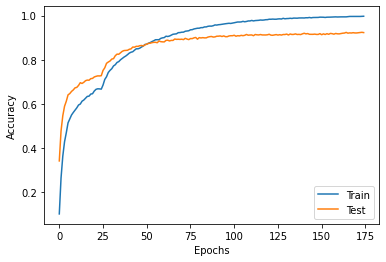

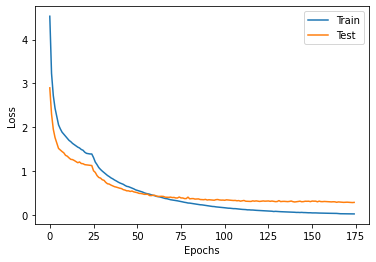

Text(0.5, 492.0, 'Predicted Class')

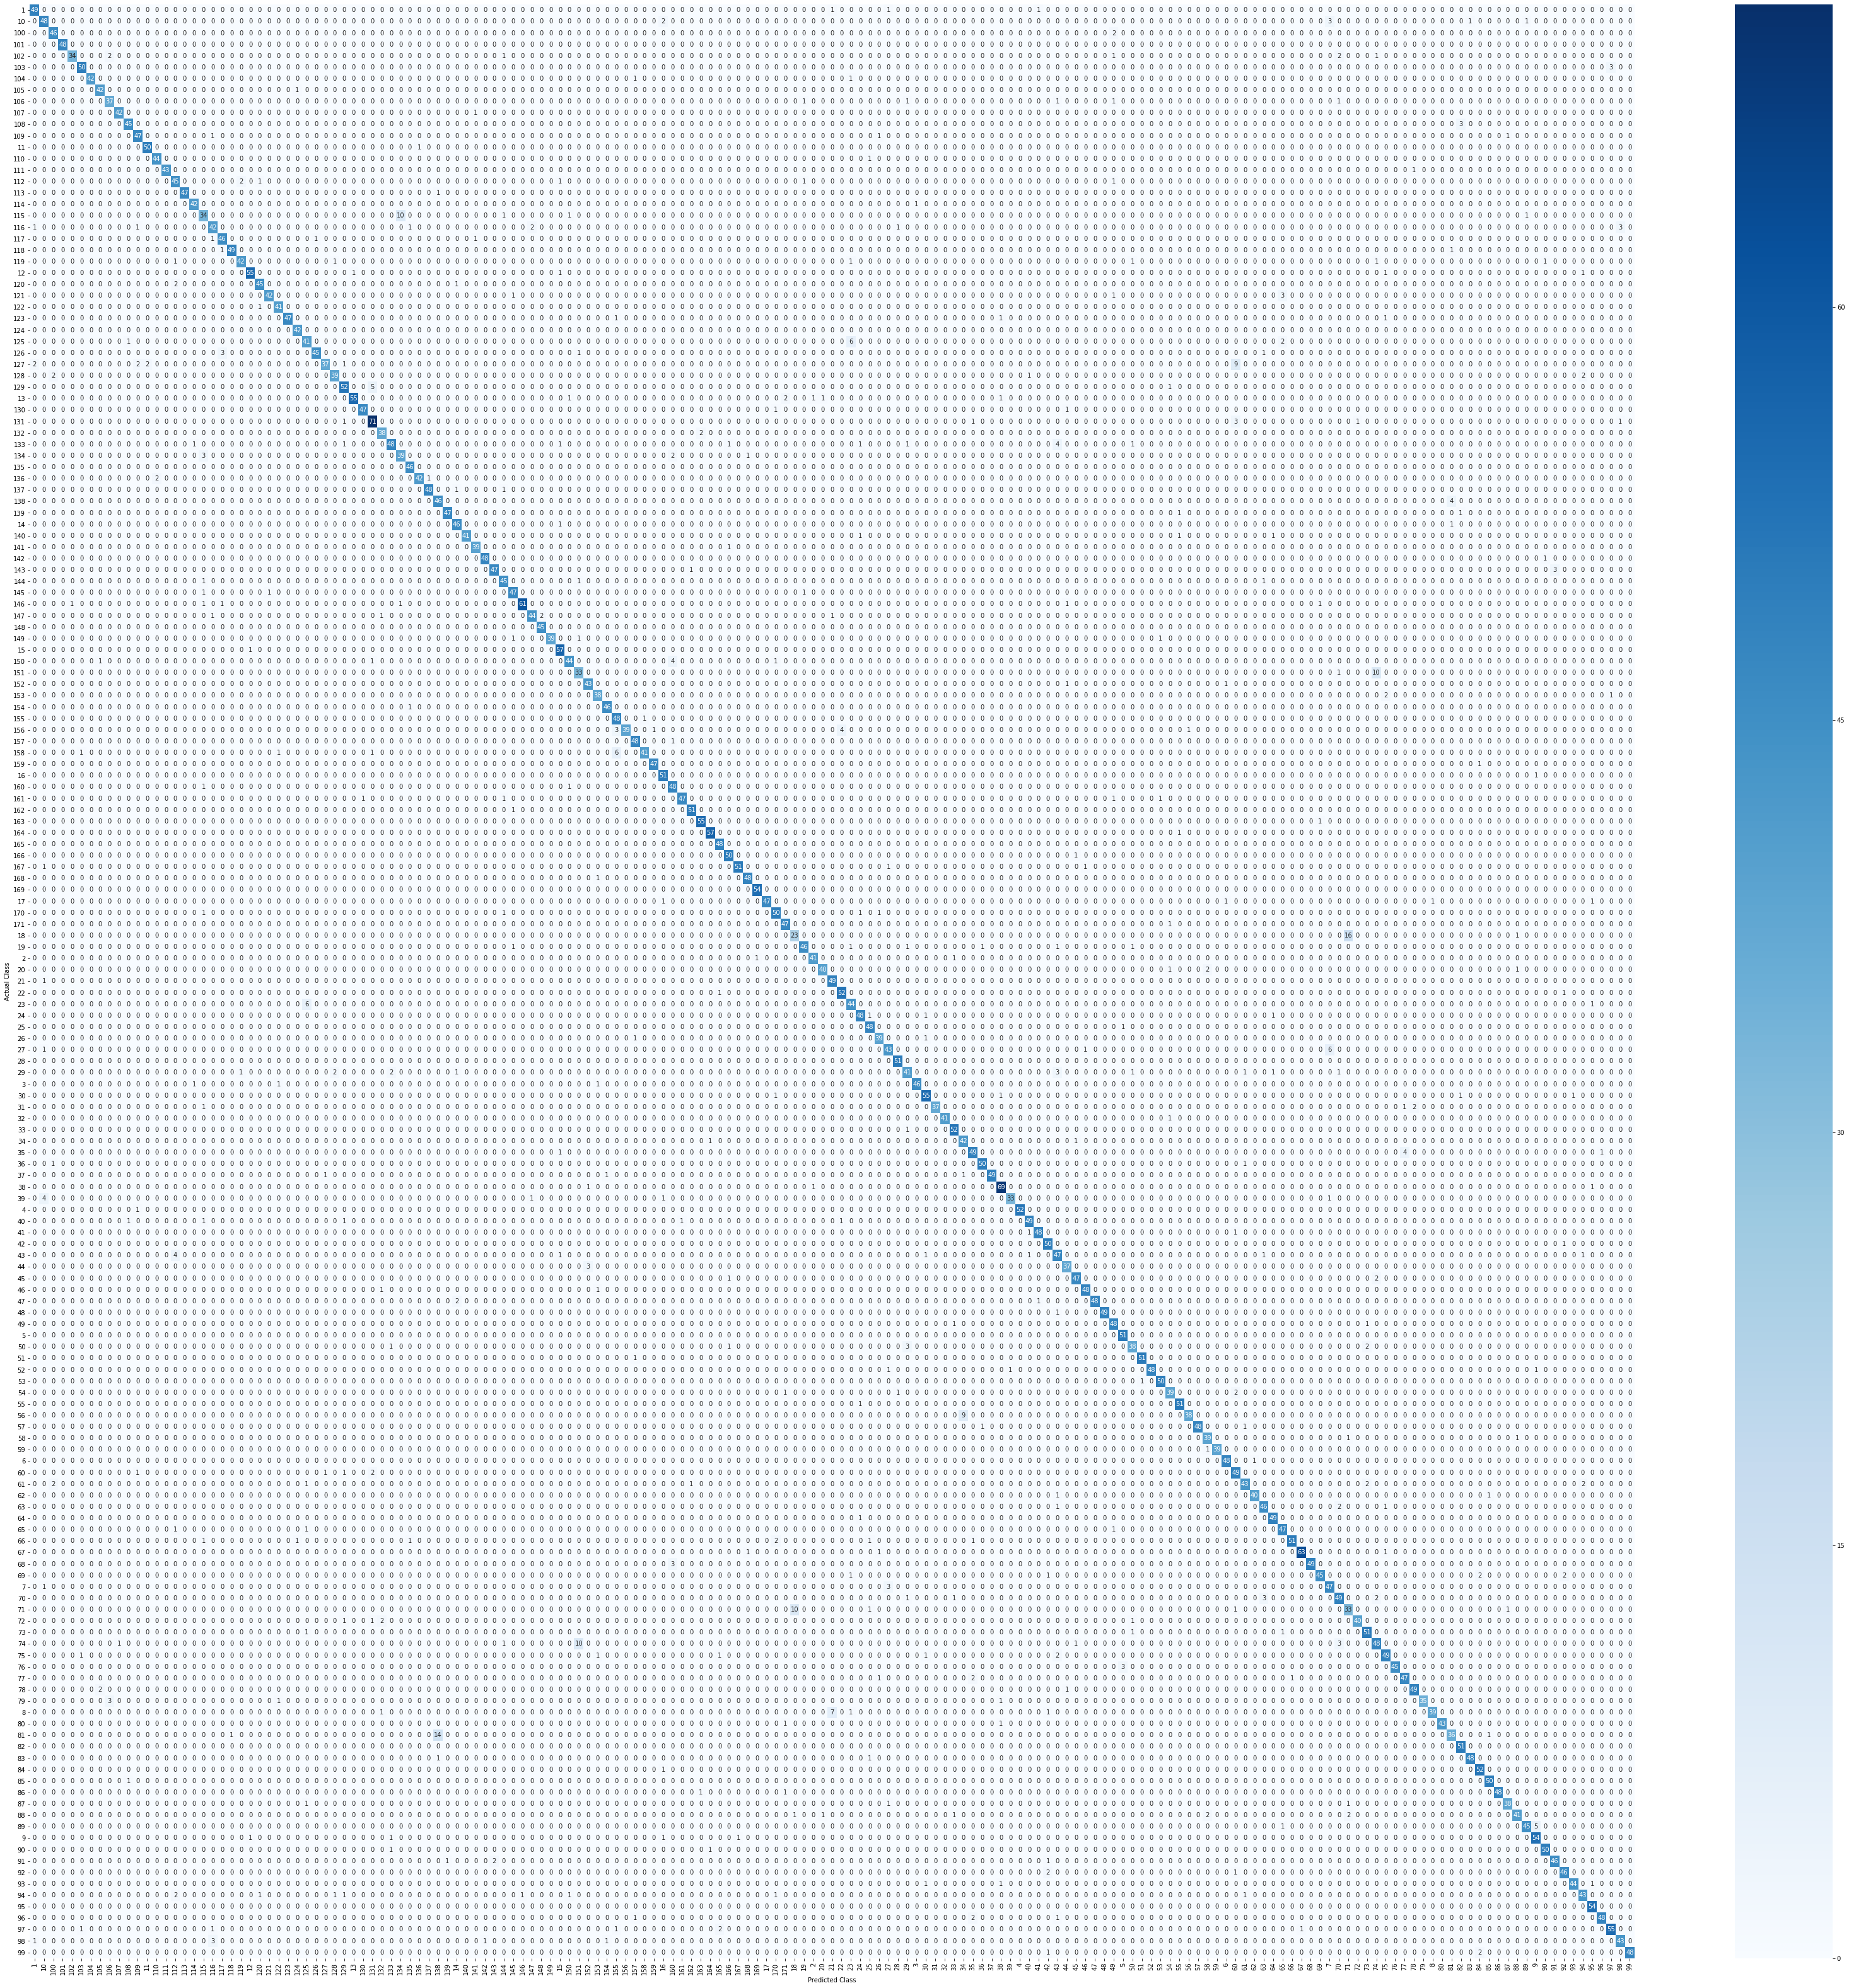

In [1]:
# HCR-Net (fine tuned network)
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import BatchNormalization as BatchNorm

# pre-trained models
from keras.applications.vgg16 import VGG16

# custom learning rates
import learning_rate as lr

# set the seeds for reproduceability (which is not certain in case of
# of multiple CPUs and GPU).
np.random.seed(1)
tf.random.set_seed(1)

# change following for each dataset (dataset details and learning params)
# dataset details
train_data_dir = './Data/Offline/CMATERdb3.1.3.3/Train/'
validation_data_dir = './Data/Offline/CMATERdb3.1.3.3/Test/'
nb_train_samples = 34439
nb_validation_samples = 8520
num_classes = 171

# learning params
epochs1 = 20
epochs2 = 155
learning_rate1 = lr.decayed_learning_rate
learning_rate2 = lr.decayed_learning_rate_tuned150

batch_size = 32
# dimensions of our images.
img_width, img_height = 32, 32
input_shape = (img_width, img_height, 3)

# using VGG16: load model without classifier layer, and using weights from ImageNet
source_model = VGG16(include_top=False, input_shape=input_shape)

# create model
model = Sequential()

# add lower layers of VGG16 to our model, and mark as not trainable
for layer in source_model.layers[:-6]:
    layer.trainable = False
    model.add(layer)

# add extra layers at top of lower layers of pre-trained model
model.add(BatchNorm())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# using ImageDataGenerator to load and scale data
train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=10,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.1,
                    zoom_range=0.05,
            #         horizontal_flip=True,
                    fill_mode='constant',
                    cval = 0
                )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True,
    seed=13)
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_validation_samples,
    color_mode="rgb",
    shuffle=False,
    class_mode='categorical')

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate1)

history1 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs1,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)


# fine tuning the model by unfreezing the lower layers (used from VGG16)
for layer in model.layers[:12]:
    layer.trainable = True

# reset the image generators
train_generator.reset()
validation_generator.reset()

# recompile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate2)

history2 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs2,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)

# save model
# model.save_weights('HCR-Net.h5')

# plot the convergence, in terms of accuracy and loss, of HCR-Net
plt.plot(history1.history['accuracy']+history2.history['accuracy'])
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'])
# plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history1.history['loss']+history2.history['loss'])
plt.plot(history1.history['val_loss']+history2.history['val_loss'])
# plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# evaluate model and plot confusion matrix
# filenames = validation_generator.filenames
predict = model.predict(validation_generator)
y_pred = np.argmax(predict,axis=-1)
cf_matrix = confusion_matrix(validation_generator.classes,y_pred)

# calculate size of confusion matrix figure, and plot it
fig, ax = plt.subplots(figsize=(math.ceil(num_classes/3.0), math.ceil(num_classes/3.0)))
labels = list(validation_generator.class_indices.keys())
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt='', cmap='Blues')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [2]:
print('precision_score: ', precision_score(validation_generator.classes,y_pred, average="macro"))
print('recall_score   : ', recall_score(validation_generator.classes,y_pred, average="macro"))
print('f1_score       : ', f1_score(validation_generator.classes,y_pred, average="macro"))
print('accuracy_score : ', accuracy_score(validation_generator.classes,y_pred, normalize=True))

print("\nBest accuracy  : ", max(max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])))

precision_score:  0.9262739369589941
recall_score   :  0.9232216276232872
f1_score       :  0.9234381280701602
accuracy_score :  0.9231220657276995

Best accuracy  :  0.9244131445884705


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

1076/1076 [==============================] - 228s 212ms/step - loss: 1.4329 - accuracy: 0.6627 - val_loss: 1.1752 - val_accuracy: 0.7177 - lr: 1.0000e-07
Epoch 2/155
1076/1076 [==============================] - 226s 210ms/step - loss: 1.4115 - accuracy: 0.6640 - val_loss: 1.1542 - val_accuracy: 0.7210 - lr: 1.0000e-07
Epoch 3/155
1076/1076 [==============================] - 227s 211ms/step - loss: 1.3954 - accuracy: 0.6687 - val_loss: 1.1466 - val_accuracy: 0.7238 - lr: 1.0000e-07
Epoch 4/155
1076/1076 [==============================] - 225s 209ms/step - loss: 1.3913 - accuracy: 0.6702 - val_loss: 1.1456 - val_accuracy: 0.7248 - lr: 1.0000e-07
Epoch 5/155
1076/1076 [==============================] - 226s 210ms/step - loss: 1.3740 - accuracy: 0.6759 - val_loss: 1.1435 - val_accuracy: 0.7242 - lr: 1.0000e-07
Epoch 6/155
1076/1076 [==============================] - 225s 209ms/step - loss: 1.3077 - accuracy: 0.6890 - val_loss: 1.0425 - val_accuracy: 0.7472 - lr: 5.0000e-06
Epoch 7/155
1076

1076/1076 [==============================] - 236s 219ms/step - loss: 0.1079 - accuracy: 0.9820 - val_loss: 0.3365 - val_accuracy: 0.9109 - lr: 5.0000e-06
Epoch 100/155
1076/1076 [==============================] - 234s 217ms/step - loss: 0.1038 - accuracy: 0.9831 - val_loss: 0.3258 - val_accuracy: 0.9119 - lr: 5.0000e-06
Epoch 101/155
1076/1076 [==============================] - 230s 214ms/step - loss: 0.1043 - accuracy: 0.9826 - val_loss: 0.3284 - val_accuracy: 0.9097 - lr: 5.0000e-06
Epoch 102/155
1076/1076 [==============================] - 229s 213ms/step - loss: 0.1032 - accuracy: 0.9818 - val_loss: 0.3245 - val_accuracy: 0.9122 - lr: 5.0000e-06
Epoch 103/155
1076/1076 [==============================] - 229s 213ms/step - loss: 0.0989 - accuracy: 0.9832 - val_loss: 0.3260 - val_accuracy: 0.9138 - lr: 5.0000e-06
Epoch 104/155
1076/1076 [==============================] - 229s 213ms/step - loss: 0.0959 - accuracy: 0.9845 - val_loss: 0.3270 - val_accuracy: 0.9122 - lr: 5.0000e-06
Epoch 

Epoch 148/155
1076/1076 [==============================] - 235s 219ms/step - loss: 0.0312 - accuracy: 0.9964 - val_loss: 0.2995 - val_accuracy: 0.9192 - lr: 1.0000e-06
Epoch 149/155
1076/1076 [==============================] - 235s 218ms/step - loss: 0.0308 - accuracy: 0.9959 - val_loss: 0.2961 - val_accuracy: 0.9207 - lr: 1.0000e-06
Epoch 150/155
1076/1076 [==============================] - 229s 213ms/step - loss: 0.0306 - accuracy: 0.9964 - val_loss: 0.3031 - val_accuracy: 0.9197 - lr: 1.0000e-06
Epoch 151/155
1076/1076 [==============================] - 229s 212ms/step - loss: 0.0315 - accuracy: 0.9960 - val_loss: 0.3032 - val_accuracy: 0.9191 - lr: 1.0000e-06
Epoch 152/155
1076/1076 [==============================] - 229s 213ms/step - loss: 0.0307 - accuracy: 0.9961 - val_loss: 0.3004 - val_accuracy: 0.9191 - lr: 1.0000e-06
Epoch 153/155
1076/1076 [==============================] - 231s 215ms/step - loss: 0.0301 - accuracy: 0.9963 - val_loss: 0.3028 - val_accuracy: 0.9201 - lr: 1.0

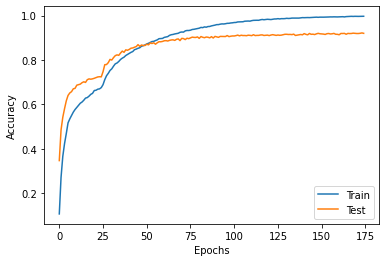

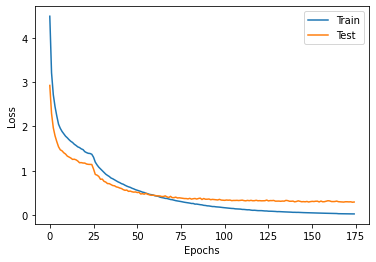

Text(0.5, 492.0, 'Predicted Class')

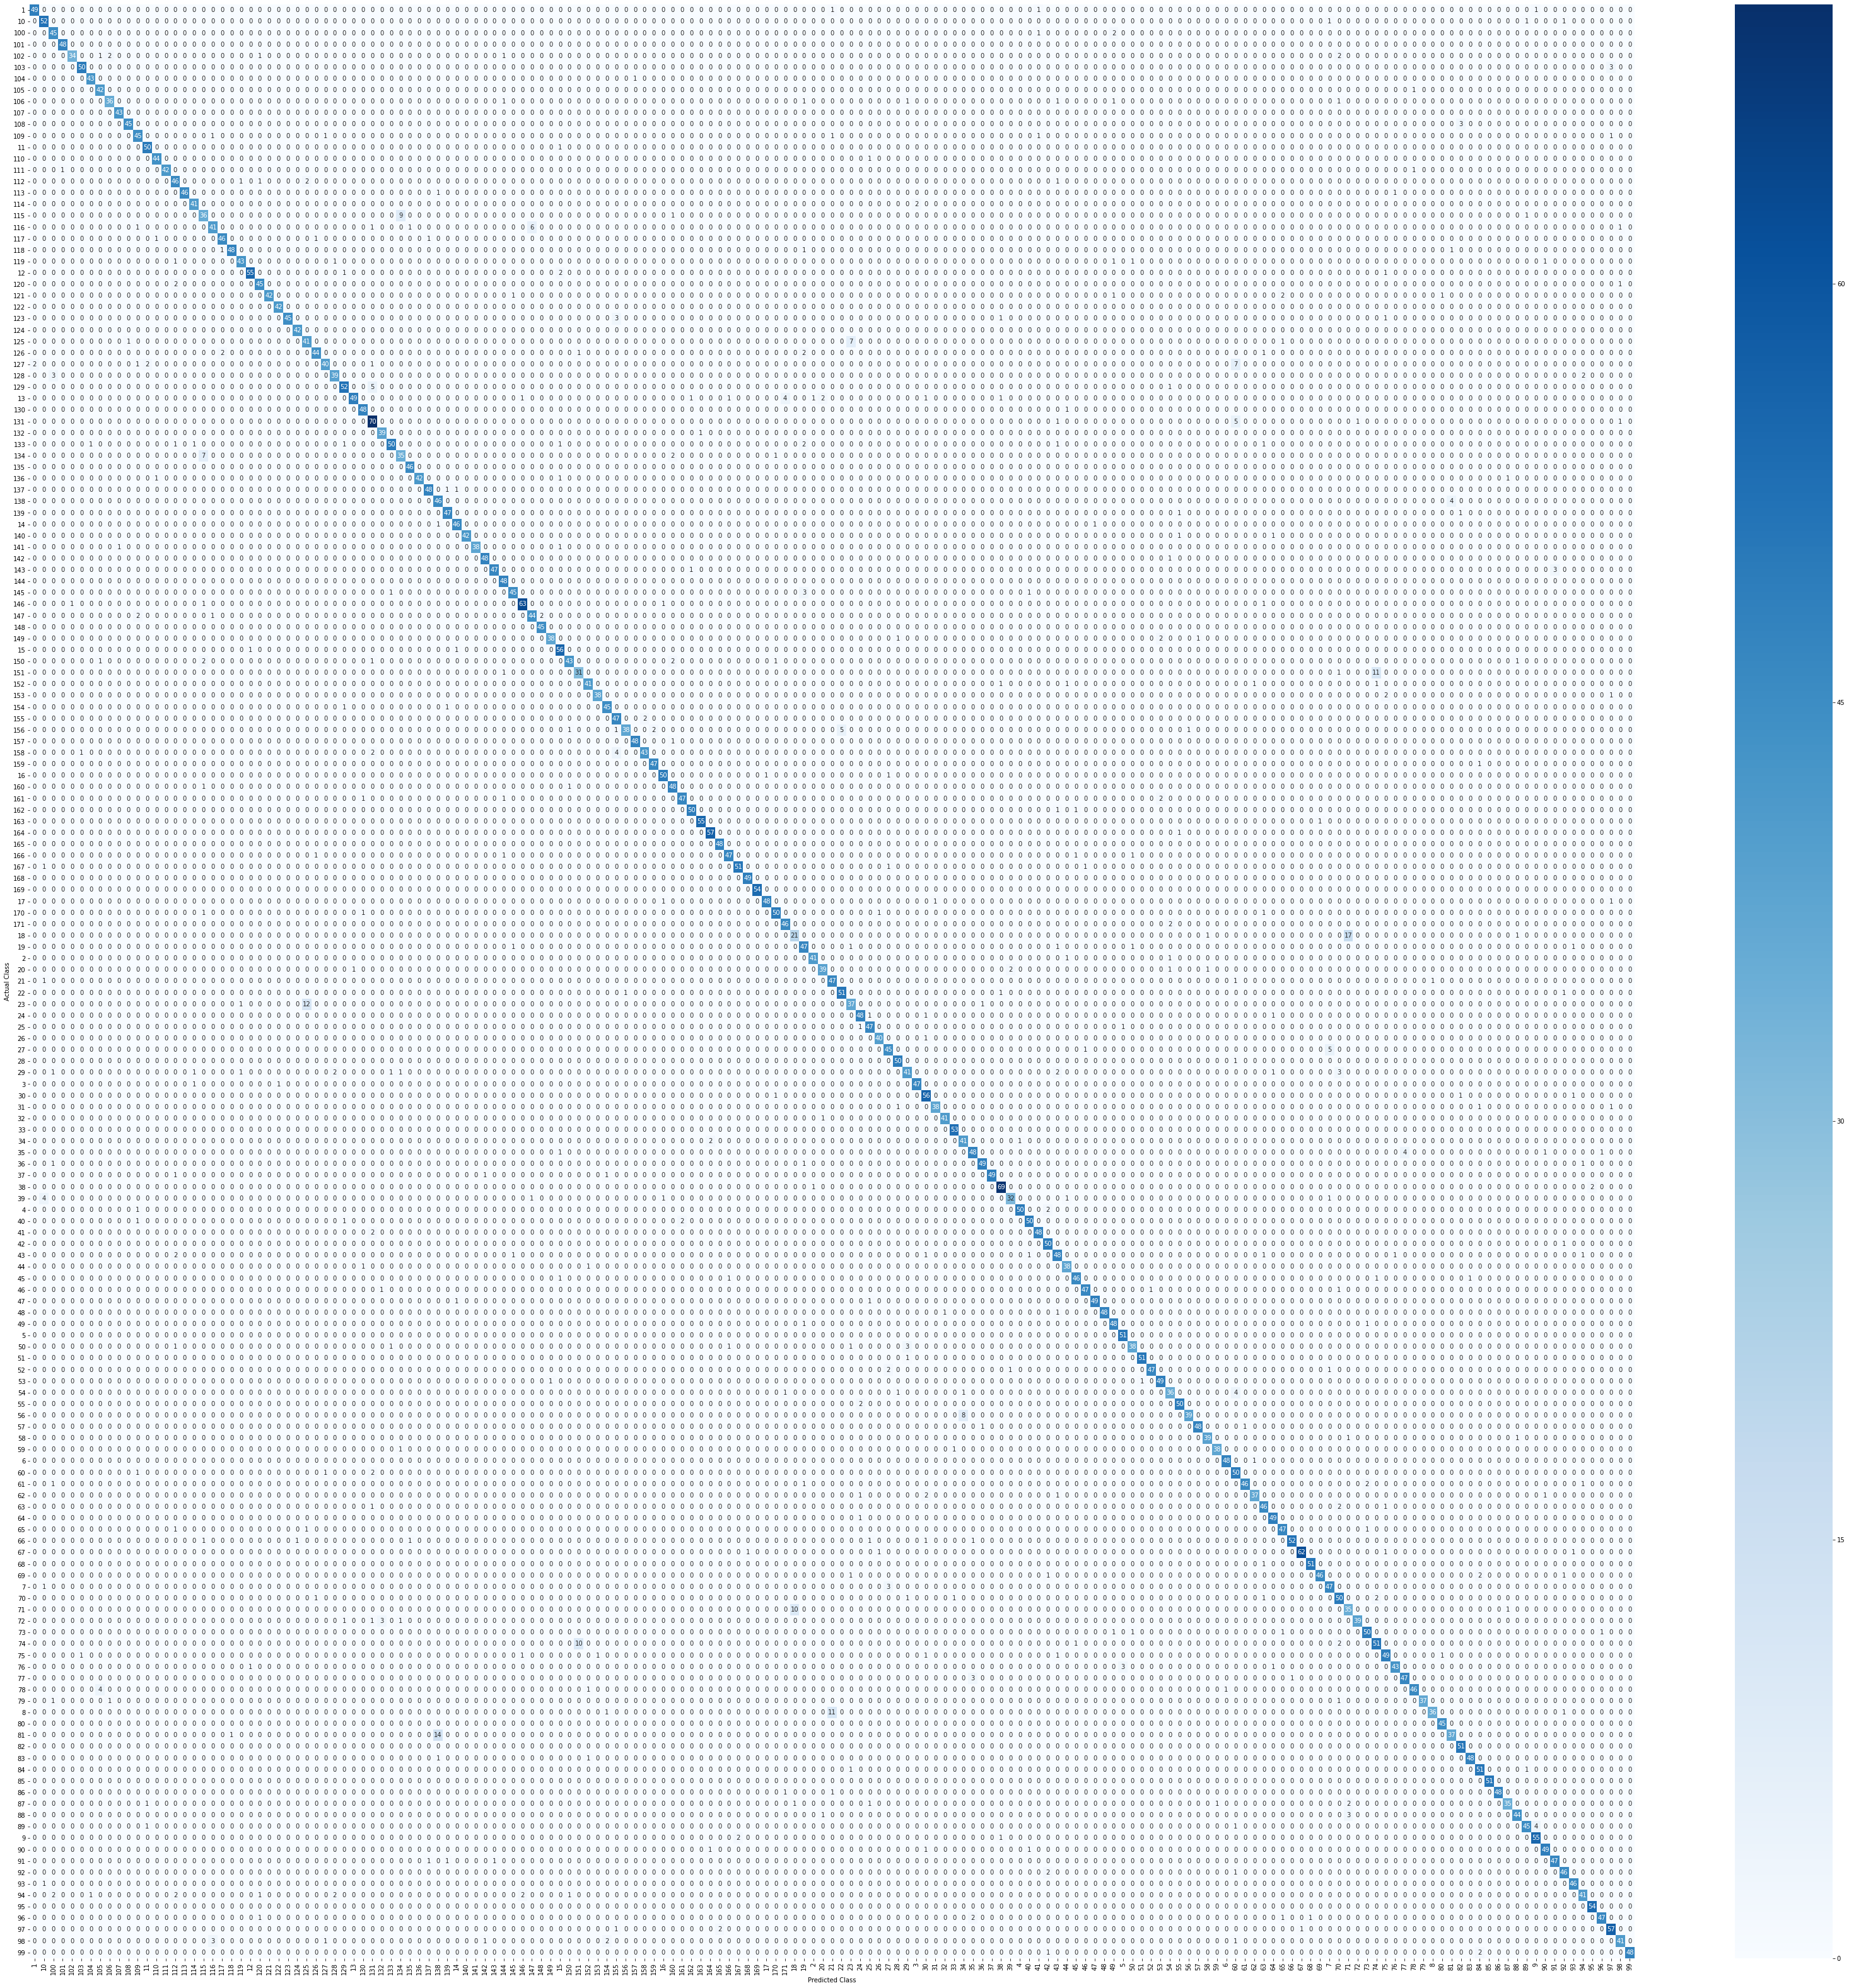

In [3]:
# HCR-Net (fine tuned network)
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import BatchNormalization as BatchNorm

# pre-trained models
from keras.applications.vgg16 import VGG16

# custom learning rates
import learning_rate as lr

# set the seeds for reproduceability (which is not certain in case of
# of multiple CPUs and GPU).
np.random.seed(1)
tf.random.set_seed(1)

# change following for each dataset (dataset details and learning params)
# dataset details
train_data_dir = './Data/Offline/CMATERdb3.1.3.3/Train/'
validation_data_dir = './Data/Offline/CMATERdb3.1.3.3/Test/'
nb_train_samples = 34439
nb_validation_samples = 8520
num_classes = 171

# learning params
epochs1 = 20
epochs2 = 155
learning_rate1 = lr.decayed_learning_rate
learning_rate2 = lr.decayed_learning_rate_tuned150

batch_size = 32
# dimensions of our images.
img_width, img_height = 32, 32
input_shape = (img_width, img_height, 3)

# using VGG16: load model without classifier layer, and using weights from ImageNet
source_model = VGG16(include_top=False, input_shape=input_shape)

# create model
model = Sequential()

# add lower layers of VGG16 to our model, and mark as not trainable
for layer in source_model.layers[:-6]:
    layer.trainable = False
    model.add(layer)

# add extra layers at top of lower layers of pre-trained model
model.add(BatchNorm())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# using ImageDataGenerator to load and scale data
train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=10,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.1,
                    zoom_range=0.05,
            #         horizontal_flip=True,
                    fill_mode='constant',
                    cval = 0
                )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True,
    seed=13)
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_validation_samples,
    color_mode="rgb",
    shuffle=False,
    class_mode='categorical')

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate1)

history1 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs1,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)


# fine tuning the model by unfreezing the lower layers (used from VGG16)
for layer in model.layers[:12]:
    layer.trainable = True

# reset the image generators
train_generator.reset()
validation_generator.reset()

# recompile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate2)

history2 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs2,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)

# save model
# model.save_weights('HCR-Net.h5')

# plot the convergence, in terms of accuracy and loss, of HCR-Net
plt.plot(history1.history['accuracy']+history2.history['accuracy'])
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'])
# plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history1.history['loss']+history2.history['loss'])
plt.plot(history1.history['val_loss']+history2.history['val_loss'])
# plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# evaluate model and plot confusion matrix
# filenames = validation_generator.filenames
predict = model.predict(validation_generator)
y_pred = np.argmax(predict,axis=-1)
cf_matrix = confusion_matrix(validation_generator.classes,y_pred)

# calculate size of confusion matrix figure, and plot it
fig, ax = plt.subplots(figsize=(math.ceil(num_classes/3.0), math.ceil(num_classes/3.0)))
labels = list(validation_generator.class_indices.keys())
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt='', cmap='Blues')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [4]:
print('precision_score: ', precision_score(validation_generator.classes,y_pred, average="macro"))
print('recall_score   : ', recall_score(validation_generator.classes,y_pred, average="macro"))
print('f1_score       : ', f1_score(validation_generator.classes,y_pred, average="macro"))
print('accuracy_score : ', accuracy_score(validation_generator.classes,y_pred, normalize=True))

print("\nBest accuracy  : ", max(max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])))

precision_score:  0.9236791327951992
recall_score   :  0.919725900254386
f1_score       :  0.9202726685924076
accuracy_score :  0.9199530516431925

Best accuracy  :  0.9217135906219482


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

1076/1076 [==============================] - 241s 224ms/step - loss: 1.4231 - accuracy: 0.6621 - val_loss: 1.1529 - val_accuracy: 0.7162 - lr: 1.0000e-07
Epoch 2/155
1076/1076 [==============================] - 237s 220ms/step - loss: 1.4060 - accuracy: 0.6654 - val_loss: 1.1485 - val_accuracy: 0.7175 - lr: 1.0000e-07
Epoch 3/155
1076/1076 [==============================] - 230s 214ms/step - loss: 1.3929 - accuracy: 0.6710 - val_loss: 1.1381 - val_accuracy: 0.7208 - lr: 1.0000e-07
Epoch 4/155
1076/1076 [==============================] - 229s 213ms/step - loss: 1.3806 - accuracy: 0.6718 - val_loss: 1.1338 - val_accuracy: 0.7208 - lr: 1.0000e-07
Epoch 5/155
1076/1076 [==============================] - 228s 212ms/step - loss: 1.3762 - accuracy: 0.6723 - val_loss: 1.1317 - val_accuracy: 0.7221 - lr: 1.0000e-07
Epoch 6/155
1076/1076 [==============================] - 226s 210ms/step - loss: 1.3092 - accuracy: 0.6890 - val_loss: 1.0083 - val_accuracy: 0.7521 - lr: 5.0000e-06
Epoch 7/155
1076

1076/1076 [==============================] - 233s 217ms/step - loss: 0.1071 - accuracy: 0.9816 - val_loss: 0.3300 - val_accuracy: 0.9154 - lr: 5.0000e-06
Epoch 100/155
1076/1076 [==============================] - 234s 218ms/step - loss: 0.1065 - accuracy: 0.9817 - val_loss: 0.3170 - val_accuracy: 0.9181 - lr: 5.0000e-06
Epoch 101/155
1076/1076 [==============================] - 239s 222ms/step - loss: 0.1046 - accuracy: 0.9826 - val_loss: 0.3184 - val_accuracy: 0.9158 - lr: 5.0000e-06
Epoch 102/155
1076/1076 [==============================] - 243s 226ms/step - loss: 0.1022 - accuracy: 0.9829 - val_loss: 0.3246 - val_accuracy: 0.9148 - lr: 5.0000e-06
Epoch 103/155
1076/1076 [==============================] - 242s 225ms/step - loss: 0.0990 - accuracy: 0.9830 - val_loss: 0.3240 - val_accuracy: 0.9156 - lr: 5.0000e-06
Epoch 104/155
1076/1076 [==============================] - 237s 220ms/step - loss: 0.0971 - accuracy: 0.9841 - val_loss: 0.3265 - val_accuracy: 0.9151 - lr: 5.0000e-06
Epoch 

Epoch 148/155
1076/1076 [==============================] - 233s 217ms/step - loss: 0.0305 - accuracy: 0.9965 - val_loss: 0.3059 - val_accuracy: 0.9223 - lr: 1.0000e-06
Epoch 149/155
1076/1076 [==============================] - 234s 218ms/step - loss: 0.0307 - accuracy: 0.9963 - val_loss: 0.3056 - val_accuracy: 0.9221 - lr: 1.0000e-06
Epoch 150/155
1076/1076 [==============================] - 244s 226ms/step - loss: 0.0318 - accuracy: 0.9957 - val_loss: 0.3040 - val_accuracy: 0.9235 - lr: 1.0000e-06
Epoch 151/155
1076/1076 [==============================] - 247s 229ms/step - loss: 0.0302 - accuracy: 0.9969 - val_loss: 0.3093 - val_accuracy: 0.9223 - lr: 1.0000e-06
Epoch 152/155
1076/1076 [==============================] - 246s 229ms/step - loss: 0.0304 - accuracy: 0.9963 - val_loss: 0.3071 - val_accuracy: 0.9234 - lr: 1.0000e-06
Epoch 153/155
1076/1076 [==============================] - 248s 230ms/step - loss: 0.0298 - accuracy: 0.9965 - val_loss: 0.3038 - val_accuracy: 0.9212 - lr: 1.0

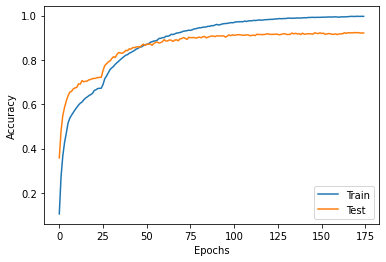

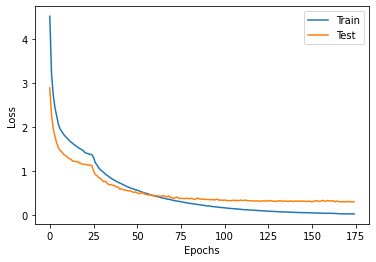

Text(0.5, 492.0, 'Predicted Class')

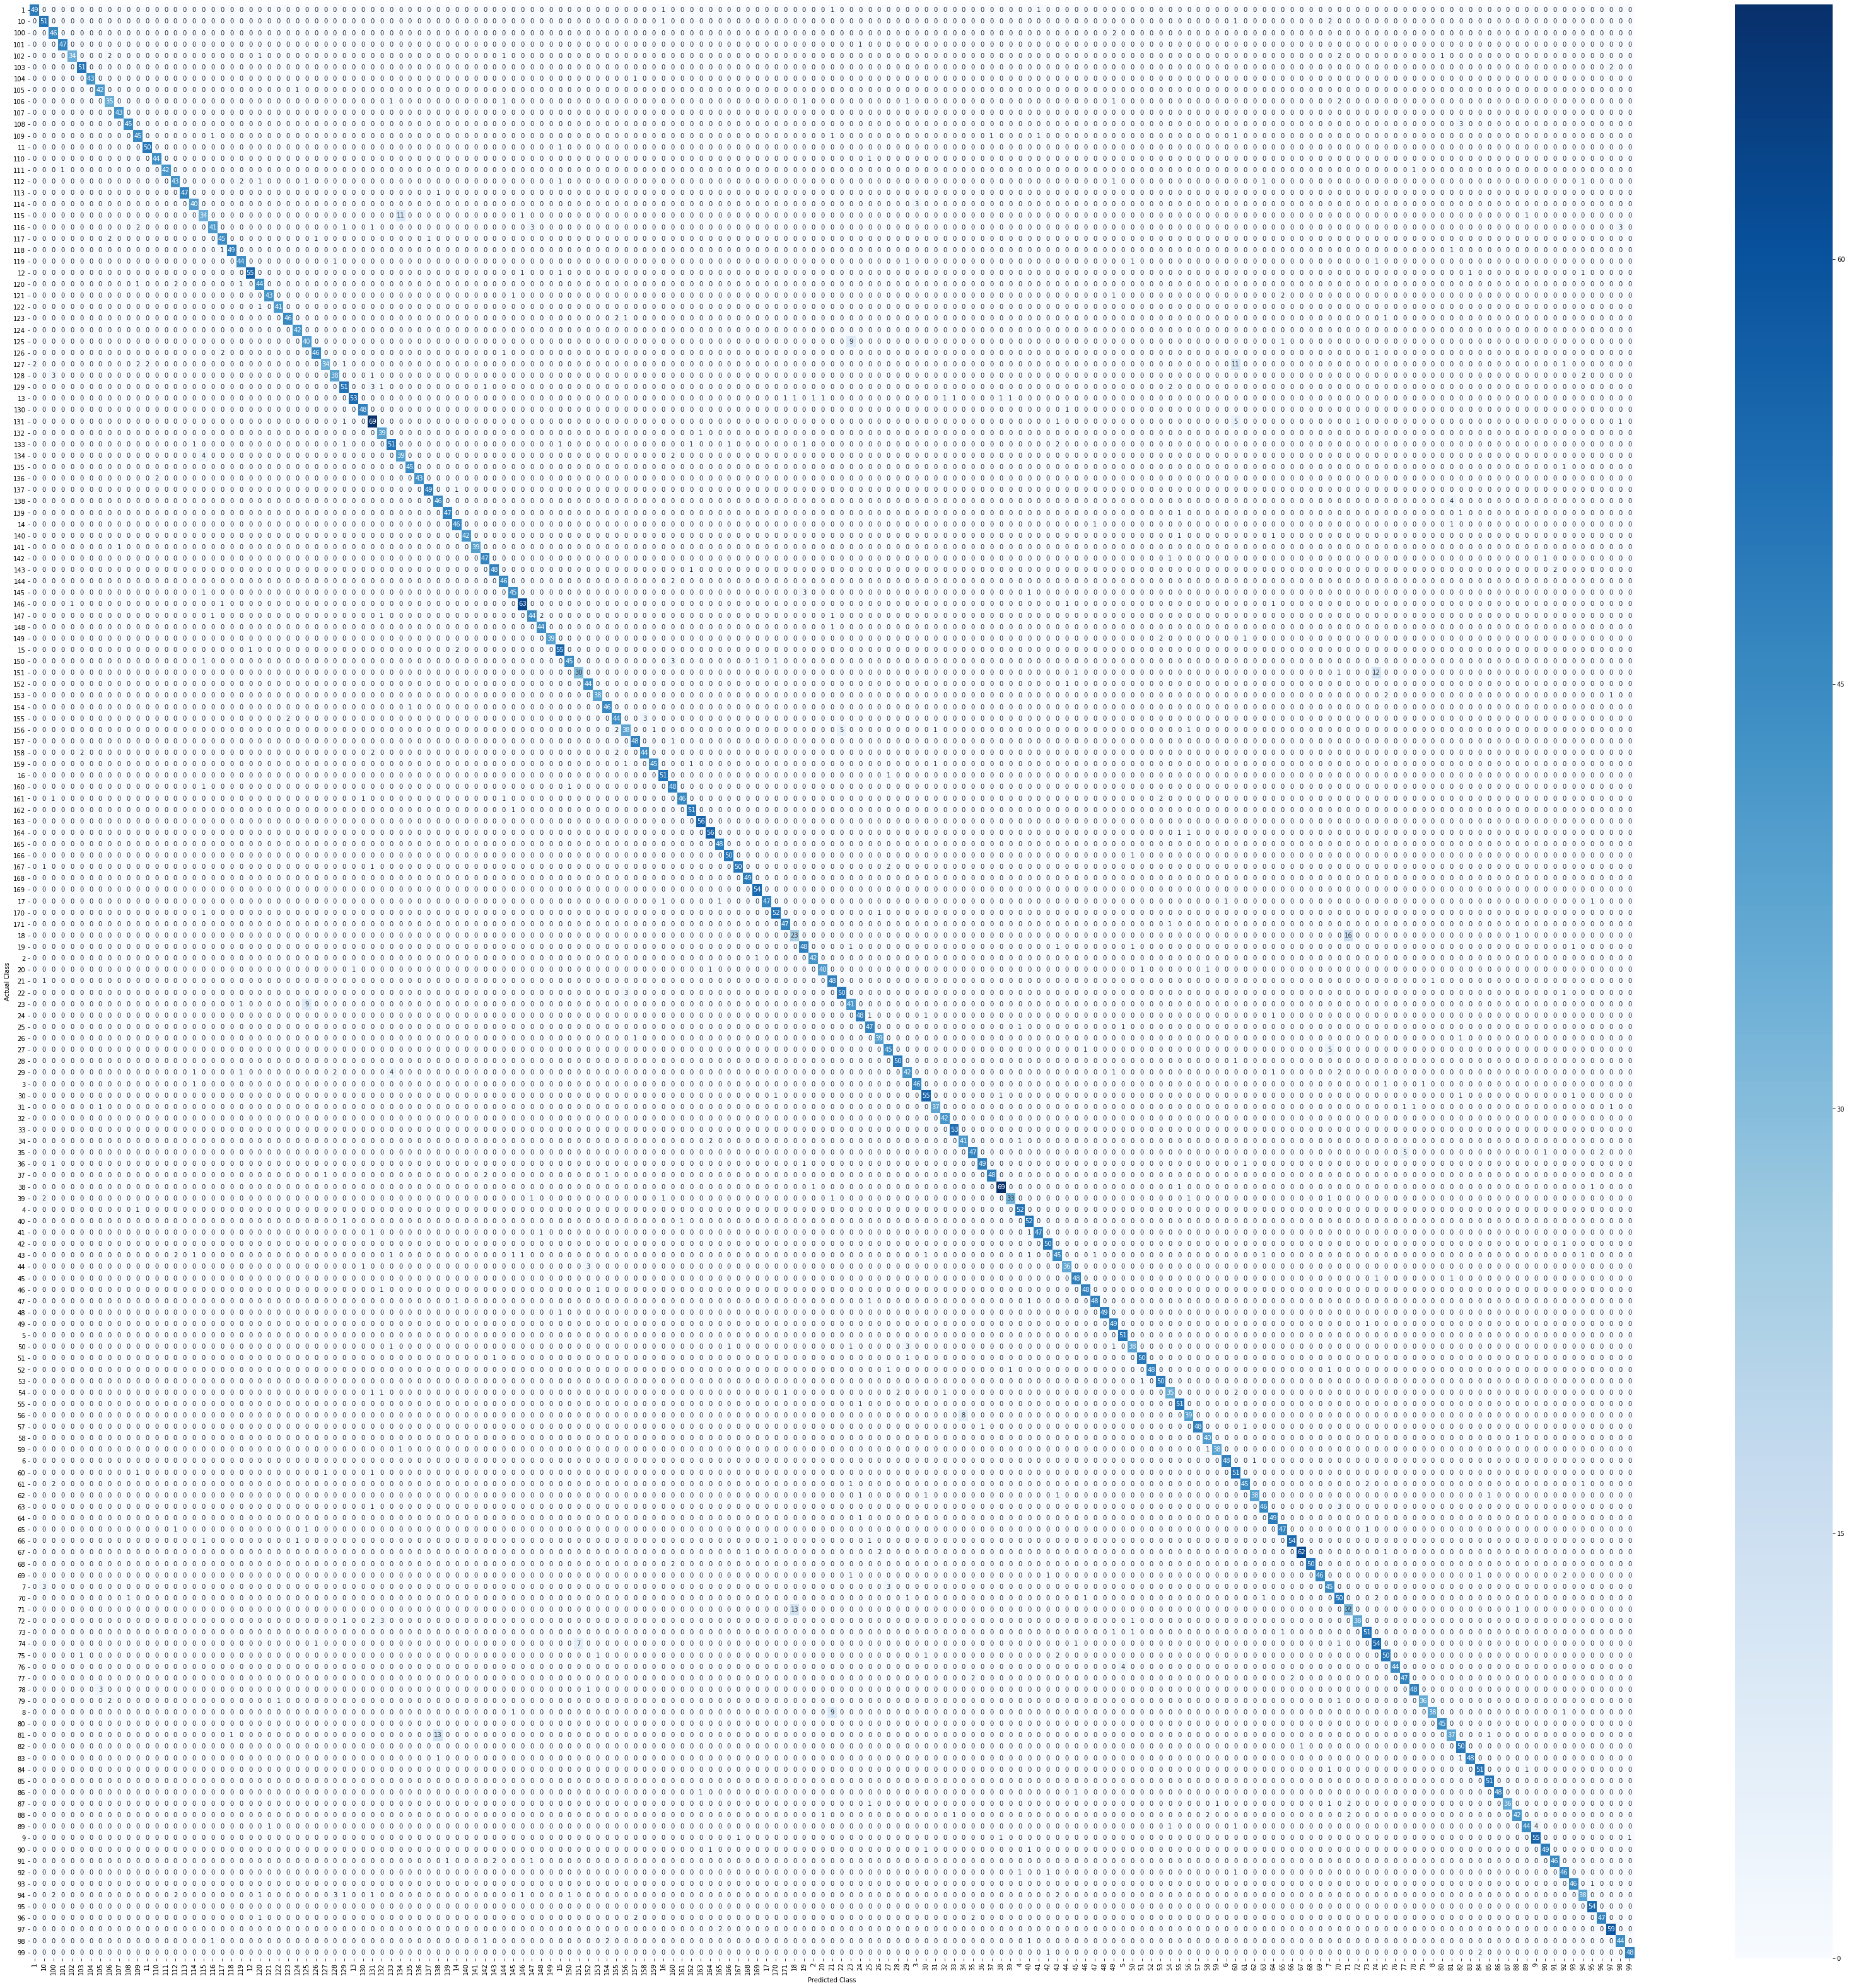

In [5]:
# HCR-Net (fine tuned network)
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import BatchNormalization as BatchNorm

# pre-trained models
from keras.applications.vgg16 import VGG16

# custom learning rates
import learning_rate as lr

# set the seeds for reproduceability (which is not certain in case of
# of multiple CPUs and GPU).
np.random.seed(1)
tf.random.set_seed(1)

# change following for each dataset (dataset details and learning params)
# dataset details
train_data_dir = './Data/Offline/CMATERdb3.1.3.3/Train/'
validation_data_dir = './Data/Offline/CMATERdb3.1.3.3/Test/'
nb_train_samples = 34439
nb_validation_samples = 8520
num_classes = 171

# learning params
epochs1 = 20
epochs2 = 155
learning_rate1 = lr.decayed_learning_rate
learning_rate2 = lr.decayed_learning_rate_tuned150

batch_size = 32
# dimensions of our images.
img_width, img_height = 32, 32
input_shape = (img_width, img_height, 3)

# using VGG16: load model without classifier layer, and using weights from ImageNet
source_model = VGG16(include_top=False, input_shape=input_shape)

# create model
model = Sequential()

# add lower layers of VGG16 to our model, and mark as not trainable
for layer in source_model.layers[:-6]:
    layer.trainable = False
    model.add(layer)

# add extra layers at top of lower layers of pre-trained model
model.add(BatchNorm())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# using ImageDataGenerator to load and scale data
train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=10,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.1,
                    zoom_range=0.05,
            #         horizontal_flip=True,
                    fill_mode='constant',
                    cval = 0
                )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True,
    seed=13)
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_validation_samples,
    color_mode="rgb",
    shuffle=False,
    class_mode='categorical')

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate1)

history1 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs1,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)


# fine tuning the model by unfreezing the lower layers (used from VGG16)
for layer in model.layers[:12]:
    layer.trainable = True

# reset the image generators
train_generator.reset()
validation_generator.reset()

# recompile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate2)

history2 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs2,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)

# save model
# model.save_weights('HCR-Net.h5')

# plot the convergence, in terms of accuracy and loss, of HCR-Net
plt.plot(history1.history['accuracy']+history2.history['accuracy'])
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'])
# plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history1.history['loss']+history2.history['loss'])
plt.plot(history1.history['val_loss']+history2.history['val_loss'])
# plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# evaluate model and plot confusion matrix
# filenames = validation_generator.filenames
predict = model.predict(validation_generator)
y_pred = np.argmax(predict,axis=-1)
cf_matrix = confusion_matrix(validation_generator.classes,y_pred)

# calculate size of confusion matrix figure, and plot it
fig, ax = plt.subplots(figsize=(math.ceil(num_classes/3.0), math.ceil(num_classes/3.0)))
labels = list(validation_generator.class_indices.keys())
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt='', cmap='Blues')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [6]:
print('precision_score: ', precision_score(validation_generator.classes,y_pred, average="macro"))
print('recall_score   : ', recall_score(validation_generator.classes,y_pred, average="macro"))
print('f1_score       : ', f1_score(validation_generator.classes,y_pred, average="macro"))
print('accuracy_score : ', accuracy_score(validation_generator.classes,y_pred, normalize=True))

print("\nBest accuracy  : ", max(max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])))

precision_score:  0.9245654741534391
recall_score   :  0.9212626093213486
f1_score       :  0.9215792996787828
accuracy_score :  0.9215962441314554

Best accuracy  :  0.9234741926193237


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

1076/1076 [==============================] - 235s 218ms/step - loss: 1.4326 - accuracy: 0.6593 - val_loss: 1.1898 - val_accuracy: 0.7196 - lr: 1.0000e-07
Epoch 2/155
1076/1076 [==============================] - 233s 217ms/step - loss: 1.4080 - accuracy: 0.6645 - val_loss: 1.1902 - val_accuracy: 0.7221 - lr: 1.0000e-07
Epoch 3/155
1076/1076 [==============================] - 236s 219ms/step - loss: 1.4063 - accuracy: 0.6666 - val_loss: 1.1741 - val_accuracy: 0.7228 - lr: 1.0000e-07
Epoch 4/155
1076/1076 [==============================] - 236s 219ms/step - loss: 1.3896 - accuracy: 0.6697 - val_loss: 1.1787 - val_accuracy: 0.7237 - lr: 1.0000e-07
Epoch 5/155
1076/1076 [==============================] - 231s 215ms/step - loss: 1.3787 - accuracy: 0.6714 - val_loss: 1.1685 - val_accuracy: 0.7262 - lr: 1.0000e-07
Epoch 6/155
1076/1076 [==============================] - 230s 213ms/step - loss: 1.3169 - accuracy: 0.6850 - val_loss: 1.0257 - val_accuracy: 0.7506 - lr: 5.0000e-06
Epoch 7/155
1076

1076/1076 [==============================] - 230s 214ms/step - loss: 0.1090 - accuracy: 0.9815 - val_loss: 0.3109 - val_accuracy: 0.9129 - lr: 5.0000e-06
Epoch 100/155
1076/1076 [==============================] - 230s 214ms/step - loss: 0.1065 - accuracy: 0.9830 - val_loss: 0.3236 - val_accuracy: 0.9129 - lr: 5.0000e-06
Epoch 101/155
1076/1076 [==============================] - 228s 212ms/step - loss: 0.1027 - accuracy: 0.9828 - val_loss: 0.3138 - val_accuracy: 0.9140 - lr: 5.0000e-06
Epoch 102/155
1076/1076 [==============================] - 228s 211ms/step - loss: 0.1017 - accuracy: 0.9827 - val_loss: 0.3199 - val_accuracy: 0.9143 - lr: 5.0000e-06
Epoch 103/155
1076/1076 [==============================] - 230s 214ms/step - loss: 0.1014 - accuracy: 0.9825 - val_loss: 0.3251 - val_accuracy: 0.9147 - lr: 5.0000e-06
Epoch 104/155
1076/1076 [==============================] - 231s 215ms/step - loss: 0.1004 - accuracy: 0.9824 - val_loss: 0.3151 - val_accuracy: 0.9161 - lr: 5.0000e-06
Epoch 

Epoch 148/155
1076/1076 [==============================] - 237s 220ms/step - loss: 0.0336 - accuracy: 0.9954 - val_loss: 0.2872 - val_accuracy: 0.9225 - lr: 1.0000e-06
Epoch 149/155
1076/1076 [==============================] - 234s 217ms/step - loss: 0.0325 - accuracy: 0.9958 - val_loss: 0.2850 - val_accuracy: 0.9234 - lr: 1.0000e-06
Epoch 150/155
1076/1076 [==============================] - 233s 217ms/step - loss: 0.0311 - accuracy: 0.9963 - val_loss: 0.2841 - val_accuracy: 0.9235 - lr: 1.0000e-06
Epoch 151/155
1076/1076 [==============================] - 234s 218ms/step - loss: 0.0312 - accuracy: 0.9967 - val_loss: 0.2820 - val_accuracy: 0.9239 - lr: 1.0000e-06
Epoch 152/155
1076/1076 [==============================] - 233s 217ms/step - loss: 0.0303 - accuracy: 0.9965 - val_loss: 0.2889 - val_accuracy: 0.9224 - lr: 1.0000e-06
Epoch 153/155
1076/1076 [==============================] - 234s 217ms/step - loss: 0.0310 - accuracy: 0.9963 - val_loss: 0.2891 - val_accuracy: 0.9222 - lr: 1.0

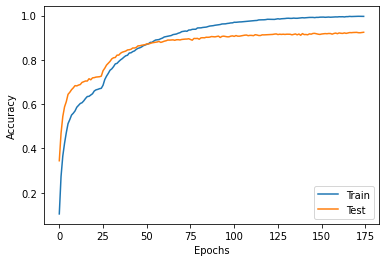

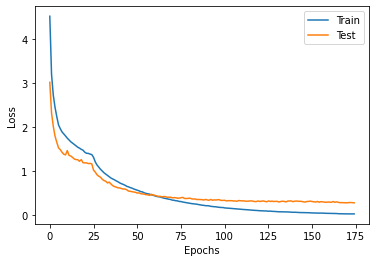

Text(0.5, 492.0, 'Predicted Class')

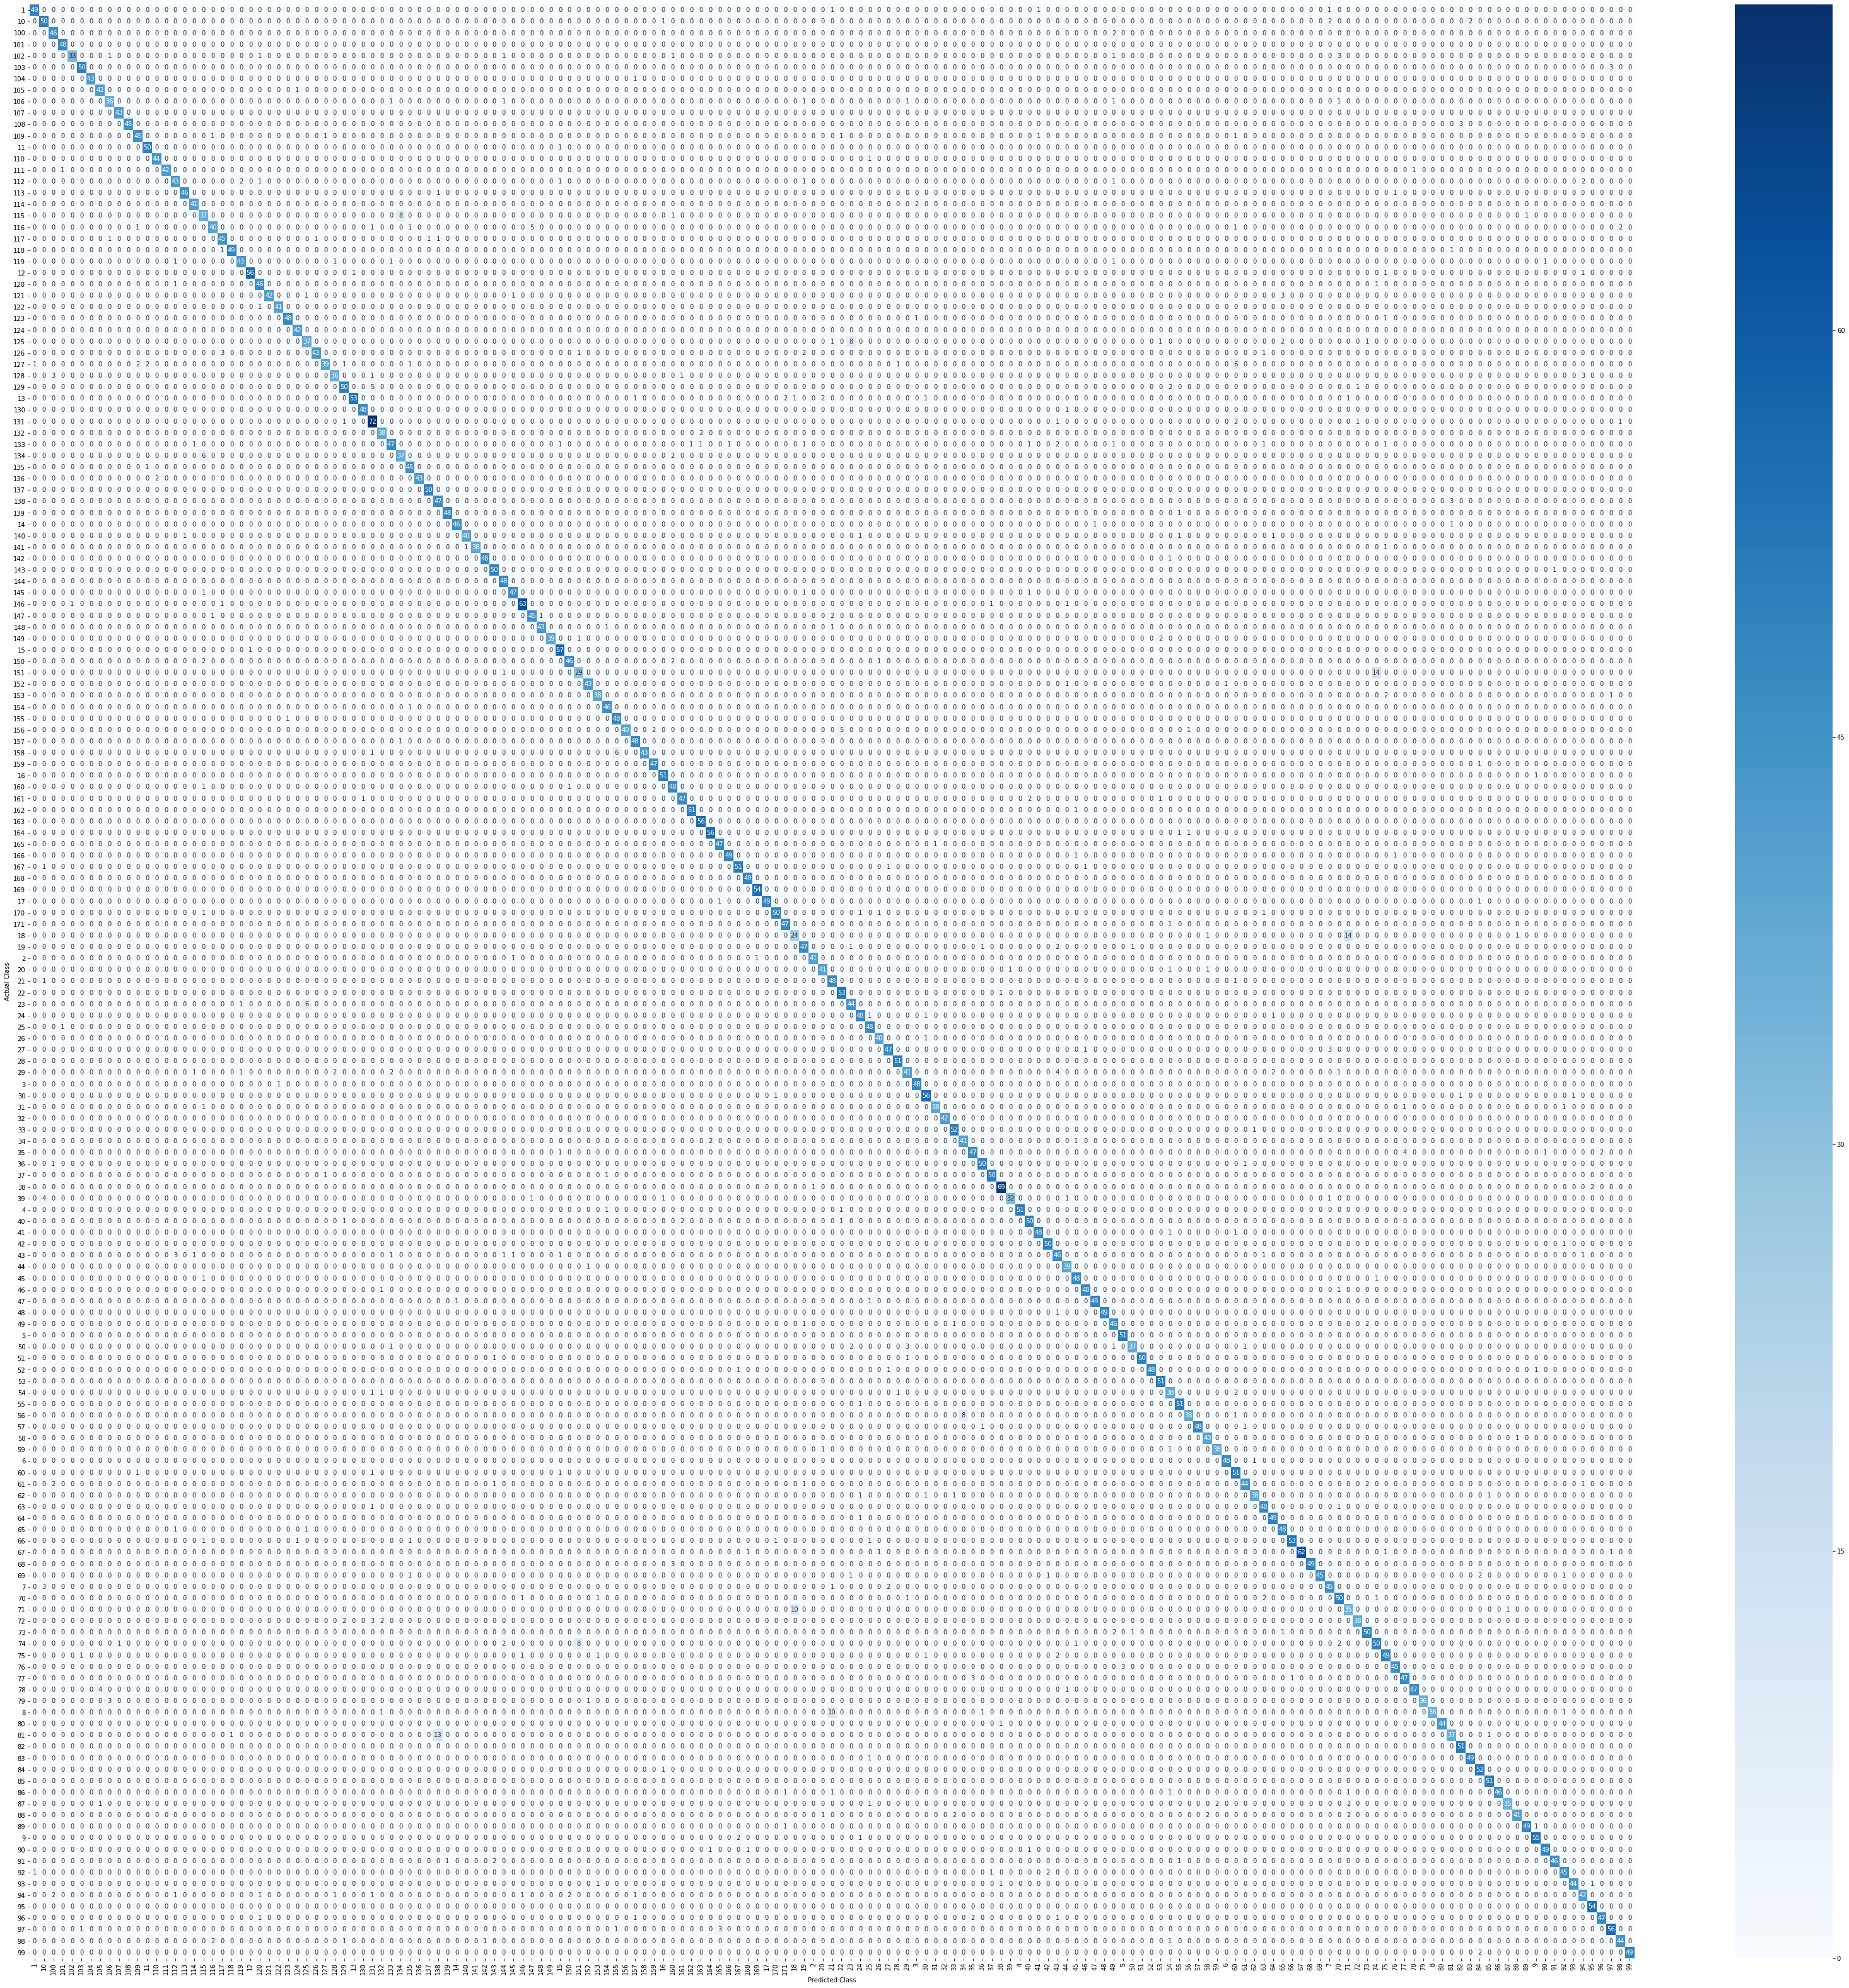

In [7]:
# HCR-Net (fine tuned network)
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import BatchNormalization as BatchNorm

# pre-trained models
from keras.applications.vgg16 import VGG16

# custom learning rates
import learning_rate as lr

# set the seeds for reproduceability (which is not certain in case of
# of multiple CPUs and GPU).
np.random.seed(1)
tf.random.set_seed(1)

# change following for each dataset (dataset details and learning params)
# dataset details
train_data_dir = './Data/Offline/CMATERdb3.1.3.3/Train/'
validation_data_dir = './Data/Offline/CMATERdb3.1.3.3/Test/'
nb_train_samples = 34439
nb_validation_samples = 8520
num_classes = 171

# learning params
epochs1 = 20
epochs2 = 155
learning_rate1 = lr.decayed_learning_rate
learning_rate2 = lr.decayed_learning_rate_tuned150

batch_size = 32
# dimensions of our images.
img_width, img_height = 32, 32
input_shape = (img_width, img_height, 3)

# using VGG16: load model without classifier layer, and using weights from ImageNet
source_model = VGG16(include_top=False, input_shape=input_shape)

# create model
model = Sequential()

# add lower layers of VGG16 to our model, and mark as not trainable
for layer in source_model.layers[:-6]:
    layer.trainable = False
    model.add(layer)

# add extra layers at top of lower layers of pre-trained model
model.add(BatchNorm())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# using ImageDataGenerator to load and scale data
train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=10,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.1,
                    zoom_range=0.05,
            #         horizontal_flip=True,
                    fill_mode='constant',
                    cval = 0
                )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True,
    seed=13)
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_validation_samples,
    color_mode="rgb",
    shuffle=False,
    class_mode='categorical')

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate1)

history1 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs1,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)


# fine tuning the model by unfreezing the lower layers (used from VGG16)
for layer in model.layers[:12]:
    layer.trainable = True

# reset the image generators
train_generator.reset()
validation_generator.reset()

# recompile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate2)

history2 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs2,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)

# save model
# model.save_weights('HCR-Net.h5')

# plot the convergence, in terms of accuracy and loss, of HCR-Net
plt.plot(history1.history['accuracy']+history2.history['accuracy'])
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'])
# plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history1.history['loss']+history2.history['loss'])
plt.plot(history1.history['val_loss']+history2.history['val_loss'])
# plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# evaluate model and plot confusion matrix
# filenames = validation_generator.filenames
predict = model.predict(validation_generator)
y_pred = np.argmax(predict,axis=-1)
cf_matrix = confusion_matrix(validation_generator.classes,y_pred)

# calculate size of confusion matrix figure, and plot it
fig, ax = plt.subplots(figsize=(math.ceil(num_classes/3.0), math.ceil(num_classes/3.0)))
labels = list(validation_generator.class_indices.keys())
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt='', cmap='Blues')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [8]:
print('precision_score: ', precision_score(validation_generator.classes,y_pred, average="macro"))
print('recall_score   : ', recall_score(validation_generator.classes,y_pred, average="macro"))
print('f1_score       : ', f1_score(validation_generator.classes,y_pred, average="macro"))
print('accuracy_score : ', accuracy_score(validation_generator.classes,y_pred, normalize=True))

print("\nBest accuracy  : ", max(max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])))

precision_score:  0.9277320826420932
recall_score   :  0.9241300481438637
f1_score       :  0.9244154691966802
accuracy_score :  0.9244131455399061

Best accuracy  :  0.9244131445884705


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

1076/1076 [==============================] - 232s 216ms/step - loss: 1.4248 - accuracy: 0.6609 - val_loss: 1.1496 - val_accuracy: 0.7216 - lr: 1.0000e-07
Epoch 2/155
1076/1076 [==============================] - 232s 215ms/step - loss: 1.4127 - accuracy: 0.6627 - val_loss: 1.1466 - val_accuracy: 0.7234 - lr: 1.0000e-07
Epoch 3/155
1076/1076 [==============================] - 232s 215ms/step - loss: 1.3865 - accuracy: 0.6703 - val_loss: 1.1368 - val_accuracy: 0.7255 - lr: 1.0000e-07
Epoch 4/155
1076/1076 [==============================] - 229s 213ms/step - loss: 1.3898 - accuracy: 0.6693 - val_loss: 1.1293 - val_accuracy: 0.7271 - lr: 1.0000e-07
Epoch 5/155
1076/1076 [==============================] - 227s 211ms/step - loss: 1.3772 - accuracy: 0.6702 - val_loss: 1.1224 - val_accuracy: 0.7296 - lr: 1.0000e-07
Epoch 6/155
1076/1076 [==============================] - 226s 210ms/step - loss: 1.3030 - accuracy: 0.6889 - val_loss: 1.0386 - val_accuracy: 0.7511 - lr: 5.0000e-06
Epoch 7/155
1076

1076/1076 [==============================] - 240s 224ms/step - loss: 0.1116 - accuracy: 0.9807 - val_loss: 0.3223 - val_accuracy: 0.9128 - lr: 5.0000e-06
Epoch 100/155
1076/1076 [==============================] - 240s 223ms/step - loss: 0.1067 - accuracy: 0.9822 - val_loss: 0.3207 - val_accuracy: 0.9128 - lr: 5.0000e-06
Epoch 101/155
1076/1076 [==============================] - 236s 219ms/step - loss: 0.1045 - accuracy: 0.9832 - val_loss: 0.3245 - val_accuracy: 0.9136 - lr: 5.0000e-06
Epoch 102/155
1076/1076 [==============================] - 233s 216ms/step - loss: 0.1036 - accuracy: 0.9828 - val_loss: 0.3232 - val_accuracy: 0.9149 - lr: 5.0000e-06
Epoch 103/155
1076/1076 [==============================] - 232s 216ms/step - loss: 0.0977 - accuracy: 0.9836 - val_loss: 0.3214 - val_accuracy: 0.9131 - lr: 5.0000e-06
Epoch 104/155
1076/1076 [==============================] - 231s 215ms/step - loss: 0.0972 - accuracy: 0.9833 - val_loss: 0.3304 - val_accuracy: 0.9115 - lr: 5.0000e-06
Epoch 

Epoch 148/155
1076/1076 [==============================] - 229s 213ms/step - loss: 0.0321 - accuracy: 0.9961 - val_loss: 0.2909 - val_accuracy: 0.9235 - lr: 1.0000e-06
Epoch 149/155
1076/1076 [==============================] - 229s 213ms/step - loss: 0.0308 - accuracy: 0.9964 - val_loss: 0.2910 - val_accuracy: 0.9232 - lr: 1.0000e-06
Epoch 150/155
1076/1076 [==============================] - 232s 216ms/step - loss: 0.0301 - accuracy: 0.9969 - val_loss: 0.2899 - val_accuracy: 0.9235 - lr: 1.0000e-06
Epoch 151/155
1076/1076 [==============================] - 237s 220ms/step - loss: 0.0302 - accuracy: 0.9966 - val_loss: 0.2918 - val_accuracy: 0.9209 - lr: 1.0000e-06
Epoch 152/155
1076/1076 [==============================] - 238s 221ms/step - loss: 0.0305 - accuracy: 0.9963 - val_loss: 0.2930 - val_accuracy: 0.9215 - lr: 1.0000e-06
Epoch 153/155
1076/1076 [==============================] - 233s 216ms/step - loss: 0.0304 - accuracy: 0.9964 - val_loss: 0.2926 - val_accuracy: 0.9210 - lr: 1.0

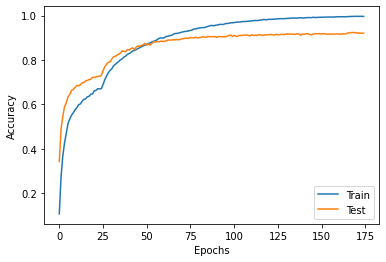

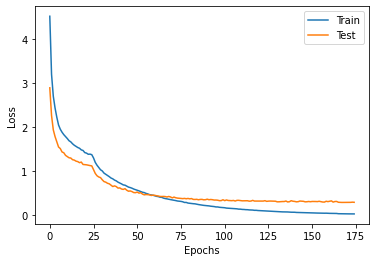

Text(0.5, 492.0, 'Predicted Class')

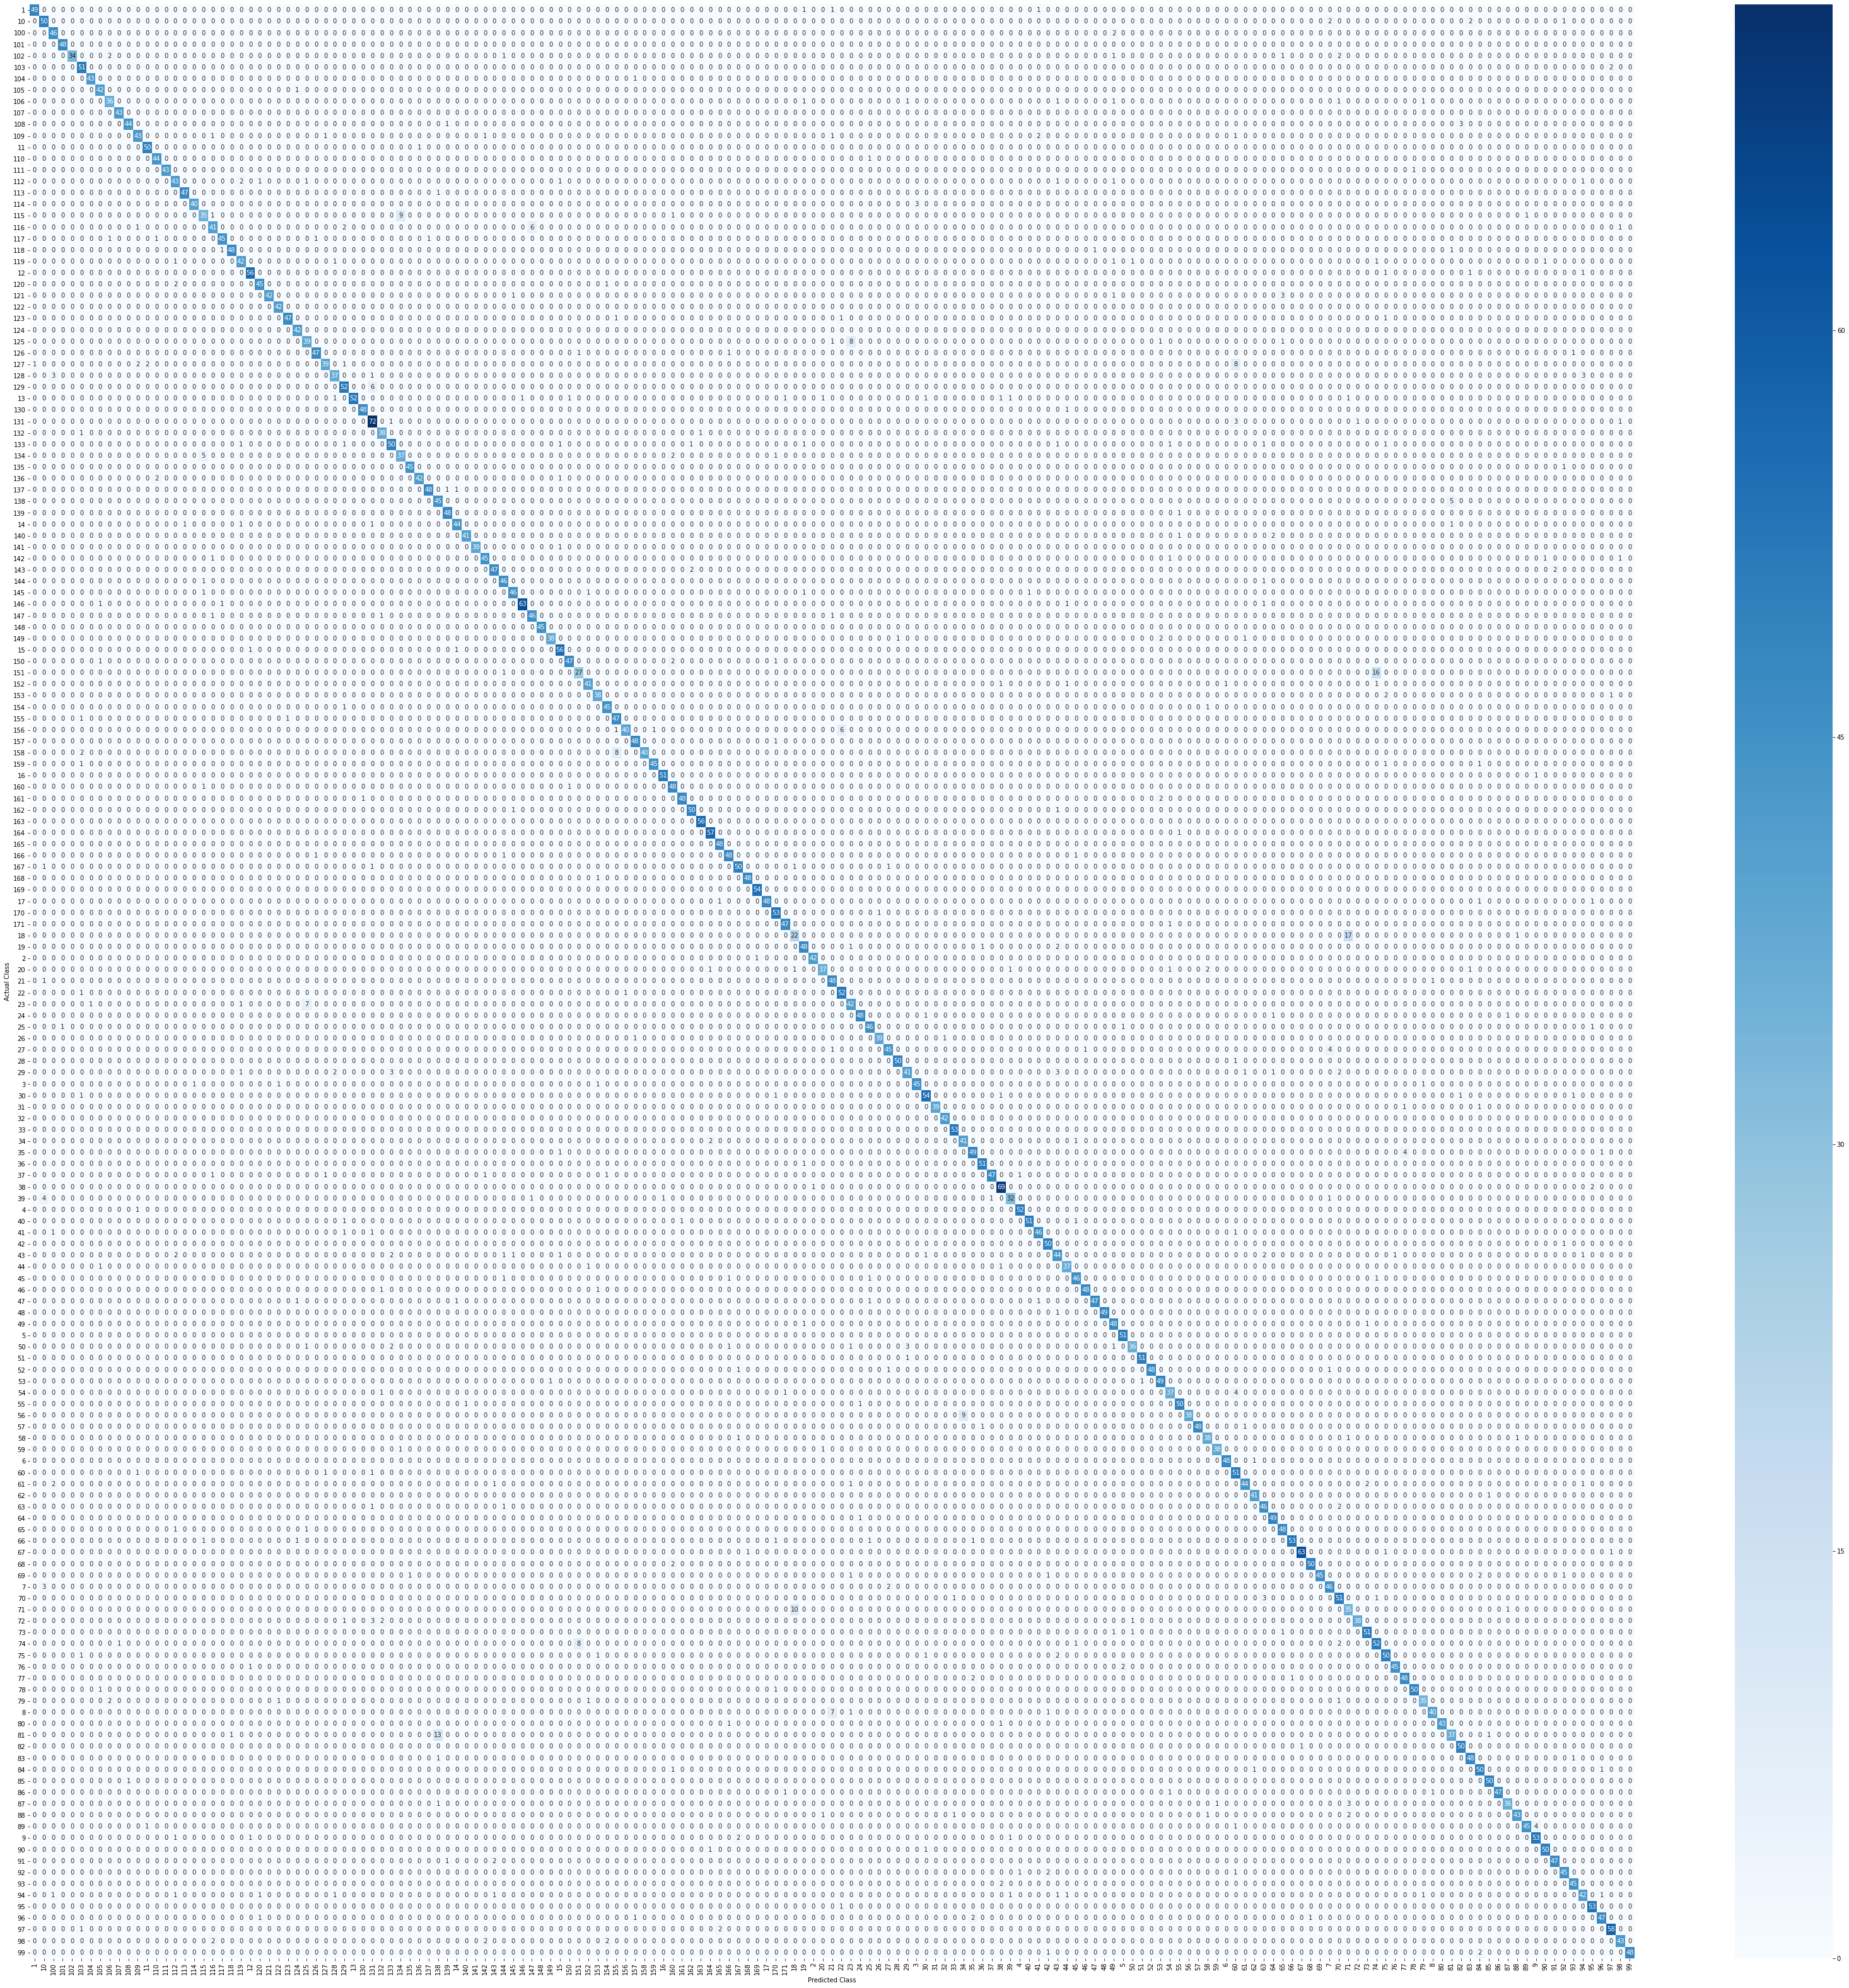

In [9]:
# HCR-Net (fine tuned network)
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import BatchNormalization as BatchNorm

# pre-trained models
from keras.applications.vgg16 import VGG16

# custom learning rates
import learning_rate as lr

# set the seeds for reproduceability (which is not certain in case of
# of multiple CPUs and GPU).
np.random.seed(1)
tf.random.set_seed(1)

# change following for each dataset (dataset details and learning params)
# dataset details
train_data_dir = './Data/Offline/CMATERdb3.1.3.3/Train/'
validation_data_dir = './Data/Offline/CMATERdb3.1.3.3/Test/'
nb_train_samples = 34439
nb_validation_samples = 8520
num_classes = 171

# learning params
epochs1 = 20
epochs2 = 155
learning_rate1 = lr.decayed_learning_rate
learning_rate2 = lr.decayed_learning_rate_tuned150

batch_size = 32
# dimensions of our images.
img_width, img_height = 32, 32
input_shape = (img_width, img_height, 3)

# using VGG16: load model without classifier layer, and using weights from ImageNet
source_model = VGG16(include_top=False, input_shape=input_shape)

# create model
model = Sequential()

# add lower layers of VGG16 to our model, and mark as not trainable
for layer in source_model.layers[:-6]:
    layer.trainable = False
    model.add(layer)

# add extra layers at top of lower layers of pre-trained model
model.add(BatchNorm())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# using ImageDataGenerator to load and scale data
train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=10,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.1,
                    zoom_range=0.05,
            #         horizontal_flip=True,
                    fill_mode='constant',
                    cval = 0
                )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True,
    seed=13)
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_validation_samples,
    color_mode="rgb",
    shuffle=False,
    class_mode='categorical')

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate1)

history1 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs1,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)


# fine tuning the model by unfreezing the lower layers (used from VGG16)
for layer in model.layers[:12]:
    layer.trainable = True

# reset the image generators
train_generator.reset()
validation_generator.reset()

# recompile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate2)

history2 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs2,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)

# save model
# model.save_weights('HCR-Net.h5')

# plot the convergence, in terms of accuracy and loss, of HCR-Net
plt.plot(history1.history['accuracy']+history2.history['accuracy'])
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'])
# plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history1.history['loss']+history2.history['loss'])
plt.plot(history1.history['val_loss']+history2.history['val_loss'])
# plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# evaluate model and plot confusion matrix
# filenames = validation_generator.filenames
predict = model.predict(validation_generator)
y_pred = np.argmax(predict,axis=-1)
cf_matrix = confusion_matrix(validation_generator.classes,y_pred)

# calculate size of confusion matrix figure, and plot it
fig, ax = plt.subplots(figsize=(math.ceil(num_classes/3.0), math.ceil(num_classes/3.0)))
labels = list(validation_generator.class_indices.keys())
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt='', cmap='Blues')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [10]:
print('precision_score: ', precision_score(validation_generator.classes,y_pred, average="macro"))
print('recall_score   : ', recall_score(validation_generator.classes,y_pred, average="macro"))
print('f1_score       : ', f1_score(validation_generator.classes,y_pred, average="macro"))
print('accuracy_score : ', accuracy_score(validation_generator.classes,y_pred, normalize=True))

print("\nBest accuracy  : ", max(max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])))

precision_score:  0.9240449512591327
recall_score   :  0.9199245030725667
f1_score       :  0.9206324100253017
accuracy_score :  0.9205399061032864

Best accuracy  :  0.9234741926193237
